<h1> Exam of 19 Febraury 2024 </h1>

<h3> Punto 1) Si legga il file SuperNovae.txt e si salvino i dati in tre liste (o array). La prima colonna è il redshift,
la seconda la distanza e la terza l’errore sulla distanza </h3>

In [332]:
data = []
redshift = []
distance = []
sigma_distance = []

with open('SuperNovae.txt','r') as output:
    file = output.read()
    file = file.split('\n')
    
    for i in range(0,len(file)):
        redshift.append(file[i].split(' ')[0])
        distance.append(file[i].split(' ')[1])
        sigma_distance.append(file[i].split(' ')[2])

redshift = [float(x) for x in redshift]
distance = [float(x) for x in distance]
sigma_distance = [float(x) for x in sigma_distance]


<h3> Punto 2) Si faccia il grafico dei dati mettendo sull’asse x il redshift z e sull’asse y la distanza DL, includendo
gli errori nel grafico.</h3>

Text(0, 0.5, 'Distance [MPc]')

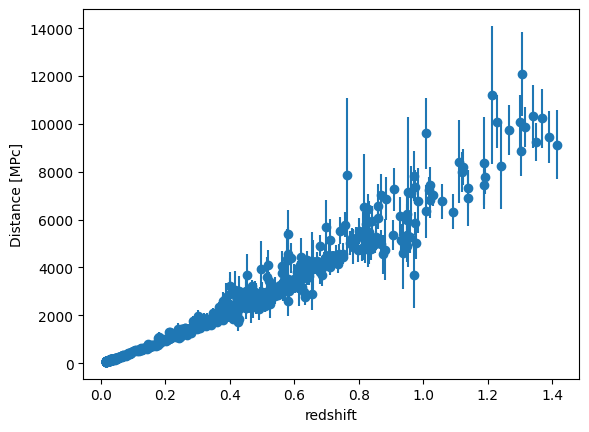

In [333]:
import matplotlib.pyplot as plt

plt.errorbar(redshift,distance,yerr = sigma_distance, marker = 'o', linestyle = 'None')
plt.xlabel('redshift')
plt.ylabel('Distance [MPc]')


<h3> Point 3) Si esegua un fit dei dati utilizzando il modello lineare e si stampi la costante di Hubble incluso il suo
errore. </h3>

$$D_L = \frac{z \cdot c}{H_0}$$

<p> per determinare la costante di Hubble, utilizziamo il metodo dei minimi quadrati</p>

In [334]:
from iminuit import Minuit
from iminuit.cost import LeastSquares
from numpy import log
import numpy as np

def func(z,H0):
    c = 3*10**8
    return c*z/H0

least_squares = LeastSquares(redshift, distance, sigma_distance, func)
my_minuit = Minuit(least_squares, H0 = 70*10**3)

my_minuit.migrad()
is_valid = my_minuit.valid

print('Fit have had success ?', is_valid)

chi_squared = my_minuit.fval
ndof = my_minuit.ndof
print('Q_squared value is:', chi_squared/ndof)

H0_1 = my_minuit.values[0]
my_minuit.hesse()


Fit have had success ? True
Q_squared value is: 3.032342423694928


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1747 (χ²/ndof = 3.0)       │              Nfcn = 25               │
│ EDM = 1.1e-07 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ H0   │  61.87e3  │  0.21e3   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬──────────┐
│    │       H0 │
├────┼──────────┤
│ H0 │ 4.26e+04 │
└────┴──────────┘

<h3> Domanda 4</h3>

In [335]:
def func2(z,q,H0):
    C = c = 3*10**8
    return c/H0*(z+0.5*(1-q)*z**2)

least_squares2 = LeastSquares(redshift,distance,sigma_distance,func2)

my_minuit2 = Minuit(least_squares2, q = -1 , H0 = 70*10**3 )
my_minuit2.migrad()
is_valid = my_minuit.valid

print('Fit have had success ?', is_valid)

chi_squared = my_minuit2.fval
ndof = my_minuit2.ndof
print('Q_squared value is:', chi_squared/ndof)

q = my_minuit2.values[0]
H0_2 = my_minuit2.values[1]
q_err = my_minuit2._errors[0]
my_minuit2.hesse()

Fit have had success ? True
Q_squared value is: 0.9682908727521491


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 556.8 (χ²/ndof = 1.0)      │              Nfcn = 54               │
│ EDM = 2.09e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ q    │   -0.13   │   0.04    │            │            │         │         │       │
│ 1 │ H0   │  69.18e3  │  0.35e3   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬───────────────────┐
│    │        q       H0 │
├────┼───────────────────┤
│  q │  0.00137  -9.7945 │
│ H0 │  -9.7945 1.23e+05 │
└────┴───────────────────┘

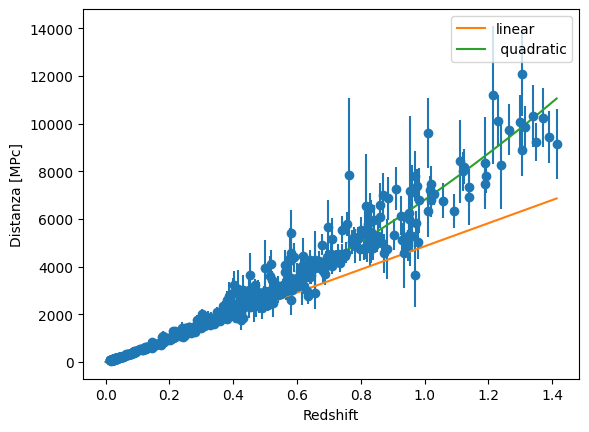

In [336]:
z = np.linspace(0,max(redshift),1000)

fig, ax = plt.subplots()
ax.errorbar(redshift,distance,yerr = sigma_distance, marker = 'o', linestyle = 'None')
ax.plot(z,func(z,H0_1), label = 'linear')
ax.plot(z,func2(z,q,H0_2), label = ' quadratic')
ax.set_xlabel('Redshift')
ax.set_ylabel('Distanza [MPc]')
ax.legend()

decidere quale dei due si adatti meglio ai dati, per decidere quale modello scegliere consideriamo quello con il p-value piu alto considerando un valore di soglia di 0.5

In [337]:
from scipy.stats import chi2

H0_finale = 0
p_value_finale = 0
modelli = [my_minuit,my_minuit2]

count = 0

for mod in modelli:
    p_value = 1-chi2.cdf(mod.fval, df = mod.ndof)
    print(p_value)
    if p_value > p_value_finale and p_value < 0.95:
        p_value_finale = p_value
        H0_finale = mod.values['H0']
        count += 1

print(f'Il Valore della Costante di Hubble è {np.round(H0_finale/10**3,2)}')       




0.0
0.6997674299703133
Il Valore della Costante di Hubble è 69.18


Calcolo del valore medio della densita dell'universo

In [338]:
omega_m = (2*q+1)/3
err_omega = np.sqrt((2/3*q_err)**2)
print("The mean value of the university density is : \n [" , omega_m, '-',err_omega, ',', omega_m, '+', err_omega ,']'  

SyntaxError: unexpected EOF while parsing (675799824.py, line 3)

<h3>Domanda 5 </h3>

<p> Utilizzando la generazione di numeri casuali uniformi, si generi un elenco di 30 indici nelle liste dei
dati in ingresso a partire dal quali si costruisca un loro sotto-campione, sul quale rifare il fit con il
modello 2</p>

In [ ]:
import random 

N=30
seed = 0.

index = []
if seed != 0. : random.seed(float(seed))
for i in range(N):
    index.append(random.randrange(0,len(redshift)))

index.sort()
redshift_sub = [redshift[i] for i in index]
distance_sub = [distance [i] for i in index]
sigma_distance_sub = [sigma_distance[i] for i in index]

least_squaresSub = LeastSquares(redshift_sub,distance_sub,sigma_distance_sub,func2)
Model2 = Minuit(least_squaresSub,q=-1,H0 =70)

Model2.migrad()




┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1434 (χ²/ndof = 51.2)      │              Nfcn = 429              │
│ EDM = nan (Goal: 0.0002)         │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │   ABOVE EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ q    │ -7.5457e3 │    nan    │            │            │         │         │       │
│ 1 │ H0   │ 8.3065e7  │    nan    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬─────────────────────┐
│    │         q        H0 │
├────┼─────────────────────┤
│  q │       nan 9.5051e12 │
│ H0 │ 9.5051e12       nan │
└────┴─────────────────────┘

<h3>Domanda 6 </h3>

<p> Ripetendo il punto precedente 50 volte si costruisca la distribuzione attesa del parametro q e della
costante di Hubble.</p>

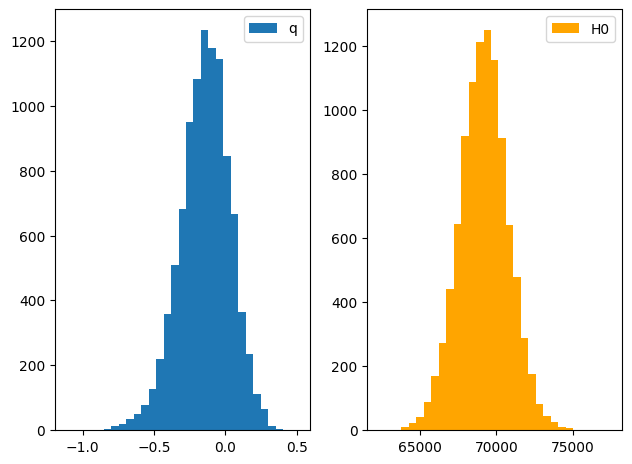

In [365]:
from math import ceil
import stats as stats

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
#This function calculate the optimal numbers of bins for making an in Histogram un function of the number of 
#events
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

def sturges(N_events):
    if len(N_events) != 1 :
        return ceil(1+3.322 * np.log(len(N_events)))
    else:
        return ceil(1+3.322 * np.log(N_events))
    

q_s = []
H0_s = []
Ntoys = 10000
N=30

for j in range(Ntoys):
    index = []
    if seed != 0. : random.seed(float(seed))
    
    for i in range(N):
        index.append(random.randrange(0,len(redshift)))

    index.sort()
    
    redshift_sub = [redshift[i] for i in index]
    distance_sub = [distance [i] for i in index]
    sigma_distance_sub = [sigma_distance[i] for i in index]
    print
    least_squaresSub3 = LeastSquares(redshift_sub,distance_sub,sigma_distance_sub,func2)
    Model3 = Minuit(least_squaresSub3,q=-1,H0 =70*10**3)
    Model3.migrad()
    q_s.append(Model3.values['q'])
    H0_s.append(Model3.values['H0'])

nbins_q = sturges(q_s)
nbins_H0 = sturges(H0_s)

bin_edges_H0 = np.linspace(min(H0_s),max(H0_s),nbins_H0)
bin_edges_q = np.linspace(min(q_s), max(q_s), nbins_q)

fig, (ax1,ax2) = plt.subplots(1,2)
plt.tight_layout()
ax1.hist(q_s,bins = bin_edges_q , label = 'q')
ax2.hist(H0_s,bins = bin_edges_H0, color = 'orange', label = 'H0')
ax1.legend()
ax2.legend()



<h3> Domanda 7 </h3>
<p> Si costruisca, utiizzando la stessa tecnica del punto precedente, la distribuzione congiunta dei parametri nel piano (q, H0)</p>

Text(0.5, 0.5, '$H_0$')

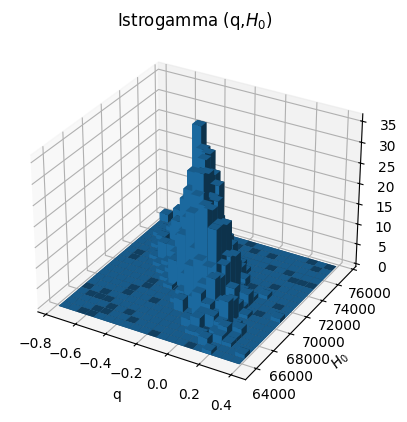

In [363]:
hist, xedges, yedges = np.histogram2d(q_s , H0_s, bins=(20,20))
xpos, ypos = np.meshgrid(xedges[:-1]+xedges[1:], yedges[:-1]+yedges[1:])
xpos = xpos.flatten()/2.
ypos = ypos.flatten()/2.
zpos = np.zeros_like (xpos)

dx = xedges [1] - xedges [0]
dy = yedges [1] - yedges [0]
dz = hist.flatten()

max_height = np.max(dz)   # get range of colorbars so we can normalize
min_height = np.min(dz)

fig1 = plt.figure()
ax = fig1.add_subplot(111,projection = '3d')

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')
plt.title("Istrogamma (q," + r'$H_0$'+')')
plt.xlabel("q")
plt.ylabel(r"$H_0$")


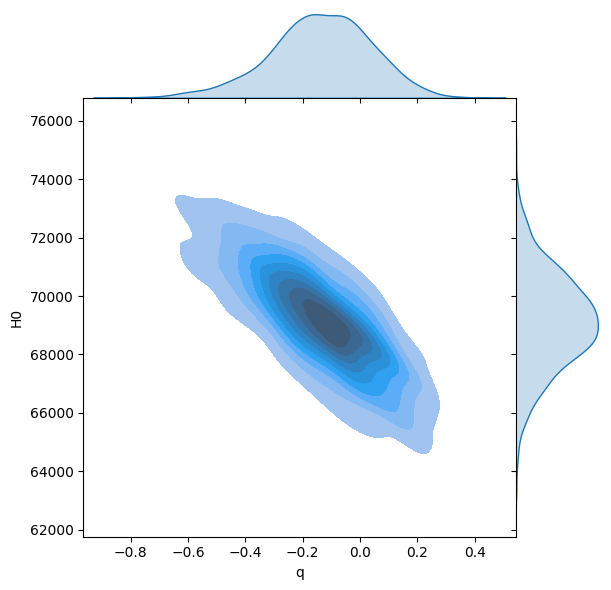

In [364]:
import seaborn as sns
import pandas as pd


data = {'q': q_s,
        'H0': H0_s}

measure = pd.DataFrame(data)

sns.jointplot(data, x = 'q', y = 'H0', kind = 'kde', fill = True, space = 0 )